In [38]:
# import codecademylib3_seaborn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<!-- Title: load and investigate the data here: -->
# Load and investigate the data here:

In [39]:
df = pd.read_csv('tennis_stats.csv')

In [40]:
print(df.describe())

              Year   FirstServe  FirstServePointsWon   
count  1721.000000  1721.000000          1721.000000  \
mean   2013.646717     0.598053             0.680738   
std       2.488018     0.054533             0.070422   
min    2009.000000     0.360000             0.270000   
25%    2012.000000     0.570000             0.650000   
50%    2014.000000     0.600000             0.690000   
75%    2016.000000     0.630000             0.720000   
max    2017.000000     0.880000             0.890000   

       FirstServeReturnPointsWon  SecondServePointsWon   
count                1721.000000           1721.000000  \
mean                    0.261673              0.479733   
std                     0.056639              0.066902   
min                     0.000000              0.060000   
25%                     0.240000              0.460000   
50%                     0.270000              0.490000   
75%                     0.290000              0.520000   
max                     0.48000

In [41]:
print(df.head())

                 Player  Year  FirstServe  FirstServePointsWon   
0           Pedro Sousa  2016        0.88                 0.50  \
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon   
0                       0.38                  0.50  \
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced   
0                        0.39     0                  0.14                 7  \
1                        0.07     7                  0.00                 7   
2                        0.44     2      

In [42]:
print("Number of rows: " + str(len(df)))
print("Number of columns: " + str(len(df.columns)))
print("Types of columns: " + str(df.dtypes))

Number of rows: 1721
Number of columns: 24
Types of columns: Player                         object
Year                            int64
FirstServe                    float64
FirstServePointsWon           float64
FirstServeReturnPointsWon     float64
SecondServePointsWon          float64
SecondServeReturnPointsWon    float64
Aces                            int64
BreakPointsConverted          float64
BreakPointsFaced                int64
BreakPointsOpportunities        int64
BreakPointsSaved              float64
DoubleFaults                    int64
ReturnGamesPlayed               int64
ReturnGamesWon                float64
ReturnPointsWon               float64
ServiceGamesPlayed              int64
ServiceGamesWon               float64
TotalPointsWon                float64
TotalServicePointsWon         float64
Wins                            int64
Losses                          int64
Winnings                        int64
Ranking                         int64
dtype: object


# Perform exploratory analysis here:

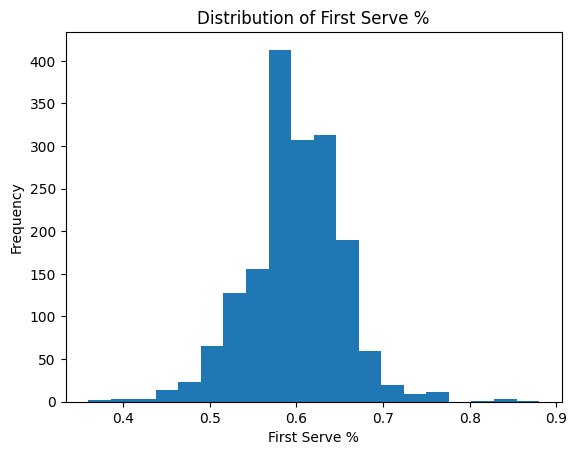

In [43]:
# Distribution of the Fist Serve
# histogram
plt.hist(df['FirstServe'], bins=20)
plt.xlabel('First Serve %')
plt.ylabel('Frequency')
plt.title('Distribution of First Serve %')
plt.show()

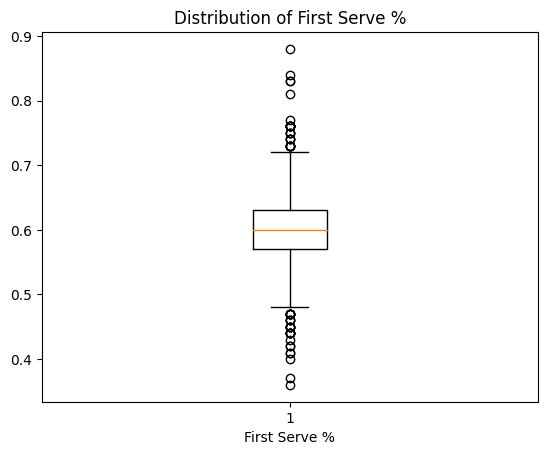

In [44]:
# boxplot
plt.boxplot(df['FirstServe'])
plt.xlabel('First Serve %')
plt.title('Distribution of First Serve %')
plt.show()

In [45]:
# mean and median of FirstServe column
print("Mean of FirstServe column: " + str(df['FirstServe'].mean()))
print("Median of FirstServe column: " + str(df['FirstServe'].median()))
# comment: the mean and median are very close to each other, so the distribution is not skewed
# compare both values to the histogram and boxplot
# the mean and median are close to the center of the distribution

Mean of FirstServe column: 0.5980534572922719
Median of FirstServe column: 0.6


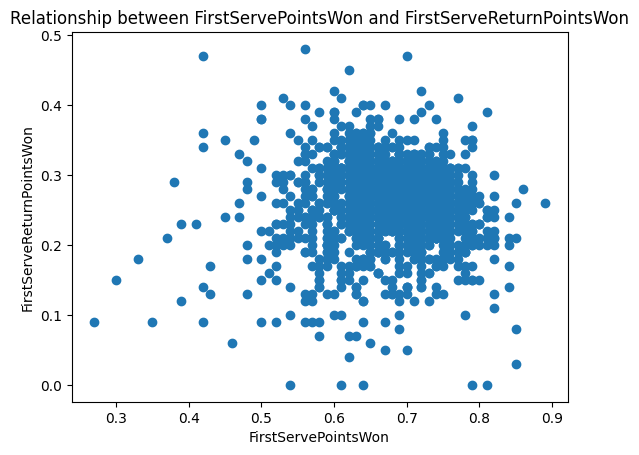

In [46]:
# Relationship between FirstServePointsWon and FirstServeReturnPointsWon
# Scatterplot
plt.scatter(df['FirstServePointsWon'], df['FirstServeReturnPointsWon'])
plt.xlabel('FirstServePointsWon')
plt.ylabel('FirstServeReturnPointsWon')
plt.title('Relationship between FirstServePointsWon and FirstServeReturnPointsWon')
plt.show()

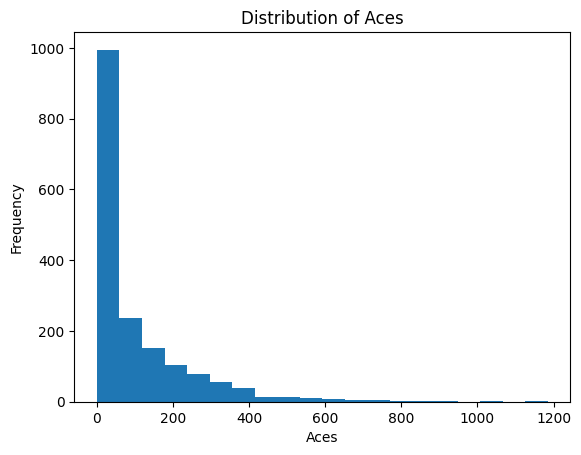

In [47]:
# Distribution of the Aces column
# histogram
plt.hist(df['Aces'], bins=20)
plt.xlabel('Aces')
plt.ylabel('Frequency')
plt.title('Distribution of Aces')
plt.show()

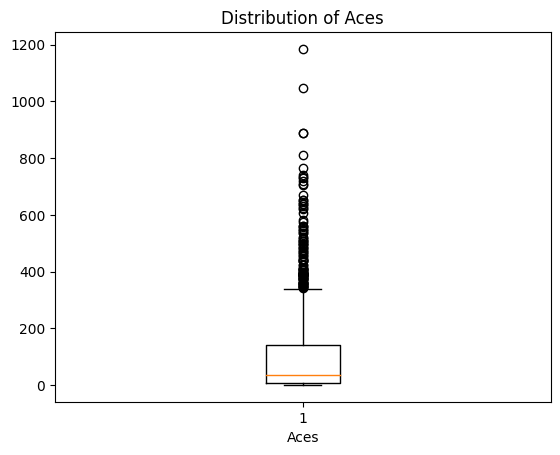

In [48]:
# boxplot
plt.boxplot(df['Aces'])
plt.xlabel('Aces')
plt.title('Distribution of Aces')
plt.show()

In [49]:
# calculate correlation between Aces and Wins columns
correlation = df['Aces'].corr(df['Wins'])

# print the result
print("Correlation between Aces and Wins: " + str(correlation))

Correlation between Aces and Wins: 0.825301192248861


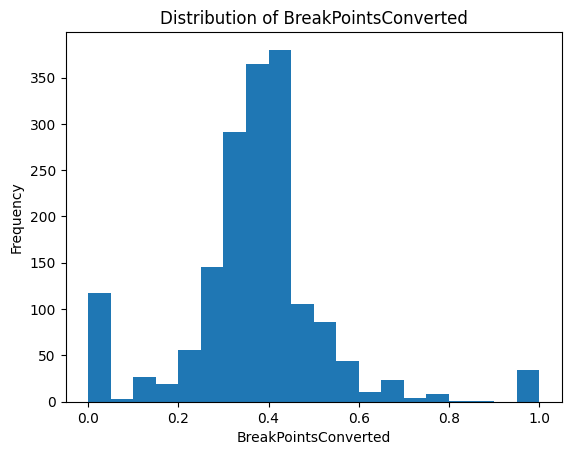

In [50]:
# Investigate the distribution of the BreakPointsConverted column
# density plot
plt.hist(df['BreakPointsConverted'], bins=20)
plt.xlabel('BreakPointsConverted')
plt.ylabel('Frequency')
plt.title('Distribution of BreakPointsConverted')
plt.show()

In [51]:
# calculate mean and median of BreakPointsFaced column
mean_break_points_faced = df['BreakPointsFaced'].mean()
median_break_points_faced = df['BreakPointsFaced'].median()

# print the results
print("Mean of BreakPointsFaced column: " + str(mean_break_points_faced))
print("Median of BreakPointsFaced column: " + str(median_break_points_faced))

Mean of BreakPointsFaced column: 112.00348634514818
Median of BreakPointsFaced column: 55.0


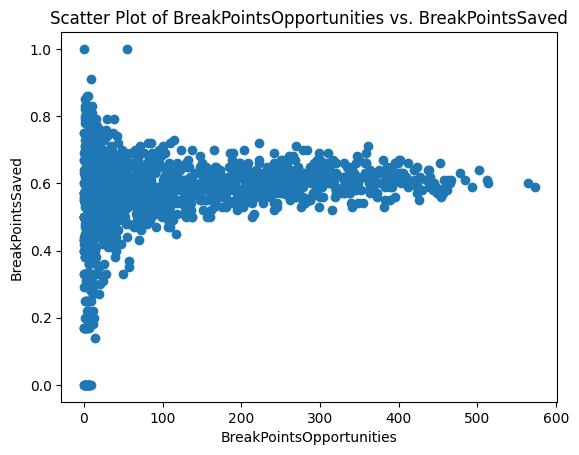

In [52]:
# create a scatter plot of BreakPointsOpportunities vs. BreakPointsSaved
plt.scatter(df['BreakPointsOpportunities'], df['BreakPointsSaved'])
plt.xlabel('BreakPointsOpportunities')
plt.ylabel('BreakPointsSaved')
plt.title('Scatter Plot of BreakPointsOpportunities vs. BreakPointsSaved')
plt.show()

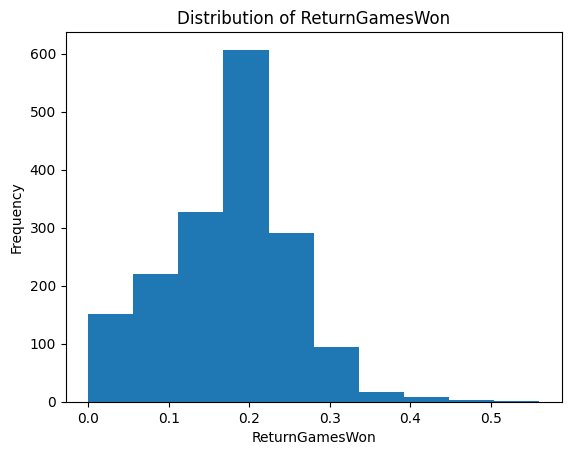

In [53]:
# create a histogram of the ReturnGamesWon column
plt.hist(df['ReturnGamesWon'])
plt.xlabel('ReturnGamesWon')
plt.ylabel('Frequency')
plt.title('Distribution of ReturnGamesWon')
plt.show()

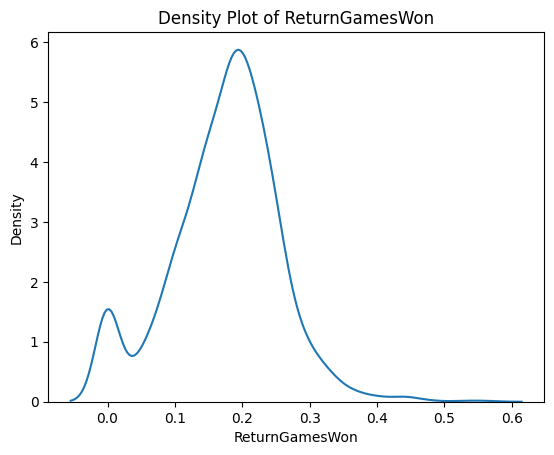

In [54]:
import seaborn as sns

# create a density plot of the ReturnGamesWon column
sns.kdeplot(df['ReturnGamesWon'])
plt.xlabel('ReturnGamesWon')
plt.ylabel('Density')
plt.title('Density Plot of ReturnGamesWon')
plt.show()

In [55]:
# calculate correlation between ReturnGamesWon and Winnings columns
correlation = df['ReturnGamesWon'].corr(df['Winnings'])

# print the result
print("Correlation between ReturnGamesWon and Winnings: " + str(correlation))

Correlation between ReturnGamesWon and Winnings: 0.2796450565493098


In [56]:
serve_points_won = df.groupby('Year')[['FirstServePointsWon', 'SecondServePointsWon']].mean()
print(serve_points_won)

      FirstServePointsWon  SecondServePointsWon
Year                                           
2009             0.689273              0.480636
2010             0.681000              0.484286
2011             0.680629              0.475472
2012             0.677305              0.475329
2013             0.680000              0.476041
2014             0.683381              0.484571
2015             0.683392              0.481542
2016             0.672560              0.479760
2017             0.683218              0.479617


In [57]:
return_games_won = df.groupby('Ranking')['ReturnGamesWon'].mean()
print(return_games_won)

Ranking
3       0.240000
4       0.250000
5       0.191667
6       0.222000
7       0.198000
          ...   
1326    0.150000
1410    0.070000
1411    0.170000
1429    0.310000
1443    0.085000
Name: ReturnGamesWon, Length: 435, dtype: float64


In [58]:
X = df[['FirstServeReturnPointsWon']]
y = df['Winnings']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = model.predict(X_test)

In [62]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: ", mse)
print("R-squared: ", r2)

Mean squared error:  56544965358.42827
R-squared:  0.043583433108363545


In [63]:
r2 = model.score(X_test, y_test)
print("R-squared: ", r2)

R-squared:  0.043583433108363545


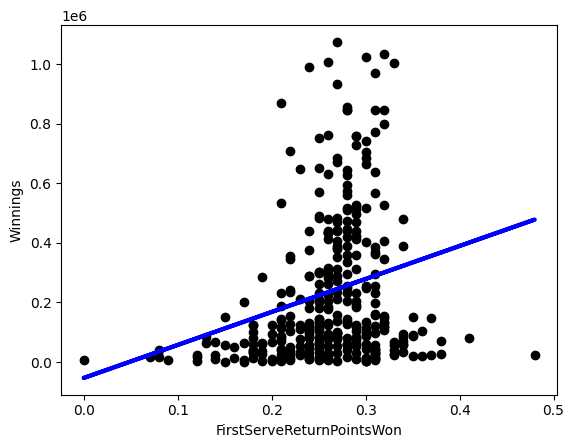

In [64]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('FirstServeReturnPointsWon')
plt.ylabel('Winnings')
plt.show()

The R-squared value of 0.043583433108363545 means that only about 4.4% of the variation in the winnings can be explained by the `FirstServeReturnPointsWon` variable. This suggests that `FirstServeReturnPointsWon` alone may not be a strong predictor of `Winnings`. 

You may want to consider including other independent variables in the model to improve its predictive power. Additionally, you can try using different machine learning algorithms or tuning the hyperparameters of the current algorithm to see if you can improve the model's performance.

In [67]:
# Define the independent and dependent variables
X = df[['Aces', 'BreakPointsOpportunities']]
y = df['Winnings']

In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [71]:
# Predict the winnings for the test data using the model
y_pred = model.predict(X_test)

In [72]:
# Calculate the R-squared value and mean squared error for the model
r2 = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R-squared: ", r2)
print("Mean squared error: ", mse)

R-squared:  0.8288735513708388
Mean squared error:  10117285129.318674


The R-squared value of 0.8288735513708388 means that about 82.9% of the variation in the `Winnings` can be explained by the independent variables included in the model. This suggests that the model is a good fit for the data and that the independent variables are strong predictors of the `Winnings`.

In general, a higher R-squared value indicates a better fit of the model to the data. However, it's important to keep in mind that the R-squared value should be interpreted in the context of the specific problem and data being analyzed, and should not be used as the sole criterion for evaluating the performance of a model. Other metrics, such as mean squared error, may also be useful for evaluating the accuracy of the model's predictions.

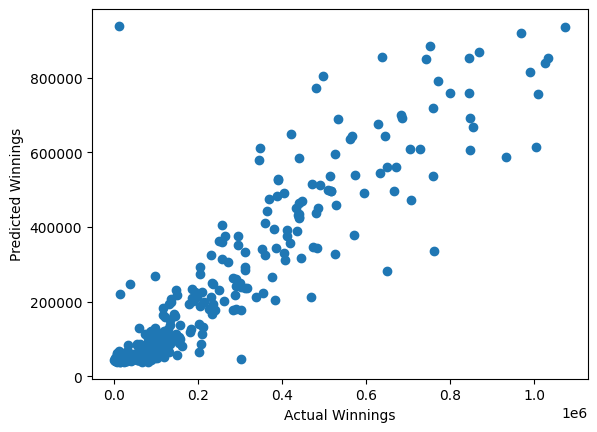

In [73]:
# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()